<a href="https://colab.research.google.com/github/profandersonvanin01/machine_learning/blob/main/3_Clustering_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering - Agrupamento

Material extraído de: https://towardsdatascience.com/machine-learning-algorithms-part-9-k-means-example-in-python-f2ad05ed5203

Os algoritmos de Clustering, é um algoritmo de aprendizado de máquina não supervisionado. Em contraste com os algoritmos tradicionais de aprendizado de máquina supervisionado, ele tenta classificar dados sem ter sido treinado primeiro com dados rotulados. Uma vez que o algoritmo tenha sido executado e os grupos definidos, quaisquer novos dados podem ser facilmente atribuídos ao grupo mais relevante.

É frequentemente usado como uma técnica de análise de dados para descobrir padrões interessantes nos dados, como grupos de clientes com base em seu comportamento.

As aplicações do mundo real do Clustering incluem:
- perfil do cliente
- segmentação de mercado
- visão computacional
- motores de busca
- astronomia

Ao contrário do aprendizado supervisionado (**como modelagem preditiva**), os algoritmos de agrupamento apenas interpretam os dados de entrada e encontram grupos ou agrupamentos naturais no espaço de recursos.

## Como funciona

1- Selecione K (ou seja, 2) pontos aleatórios como centros de cluster chamados centróides

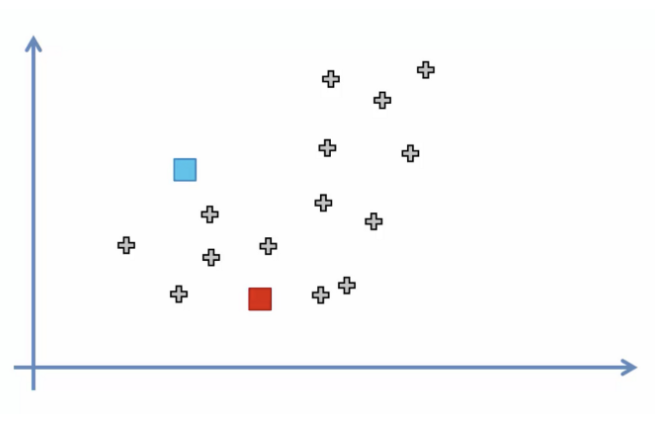

2- Atribua cada ponto de dados ao cluster mais próximo calculando sua distância em relação a cada centroide

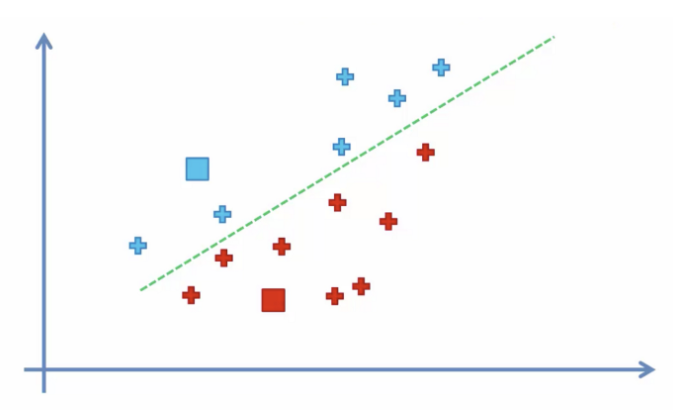

3- Determine o novo centro do cluster calculando a média dos pontos atribuídos

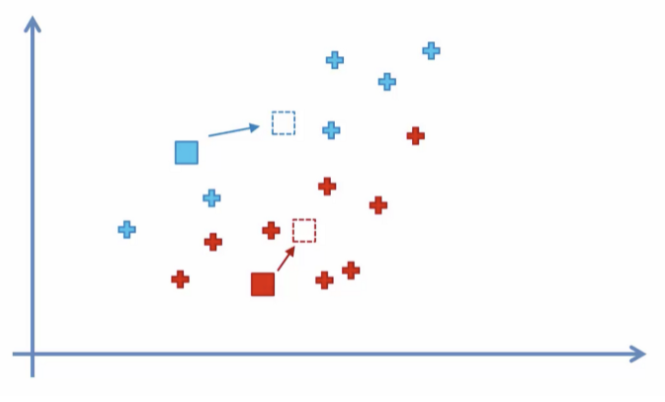

4- Repita as etapas 2 e 3 até que nenhuma das atribuições do cluster seja alterada

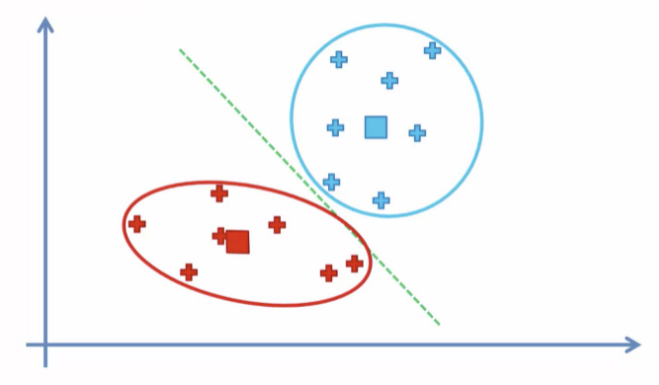

Existem muitos tipos de algoritmos de agrupamento.

Muitos algoritmos usam medidas de similaridade ou distância entre exemplos no espaço de características em um esforço para descobrir regiões densas de observações.

A biblioteca scikit-learn fornece um conjunto de diferentes algoritmos de clustering para escolher.

Uma lista de 10 dos algoritmos mais populares é a seguinte:

- Affinity Propagation
- Agglomerative Clustering
- BIRCH
- DBSCAN
- K-Means
- Mini-Batch K-Means
- Mean Shift
- OPTICS
- Spectral Clustering
- Mixture of Gaussians

Cada algoritmo oferece uma abordagem diferente para o desafio de descobrir grupos naturais em dados.

Não existe o melhor algoritmo de agrupamento e nenhuma maneira fácil de encontrar o melhor algoritmo para seus dados sem usar experimentos controlados.

Para saber mais sobre algoritmos de Clustering, consulte [aqui](https://scikit-learn.org/stable/modules/clustering.html).

# Parte prática

Vamos dar uma olhada em como podemos classificar os dados usando o algoritmo K-Means. Como sempre, precisamos começar importando as bibliotecas necessárias.

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

Nesta aula, vamos gerar nossos próprios dados usando a função **make_blobs** do módulo **sklearn.datasets**. O parâmetro **centers** especifica o número de clusters.

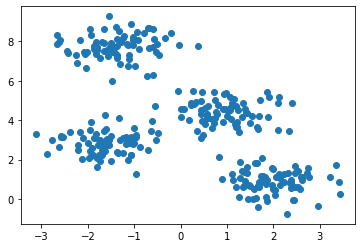

In [3]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(X[:,0], X[:,1])

Embora já saibamos o número ideal de clusters, imagine que ainda poderíamos nos beneficiar ao determiná-lo usando o **método do cotovelo** . Para obter os valores usados ​​no gráfico, treinamos vários modelos usando um número diferente de clusters e armazenando o valor da propriedade **intertia_** (WCSS) a cada vez.

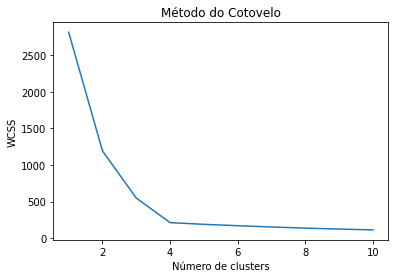

In [5]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Método do Cotovelo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()

Em seguida, categorizaremos os dados usando o número ideal de clusters (4) que determinamos na última etapa. **k-means++** garante que você não precise gerar uma inicialização aleatória.

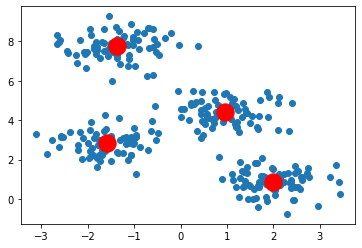

In [6]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

# Exemplo 2 - Base de Dados Iris

Neste exemplo vamos utilizar a base de dados Iris que usamos na aula anterior que possui 150 entradas com 1 variável dependente (rótulo) e 4 recursos (apenas para comparar os resultados)

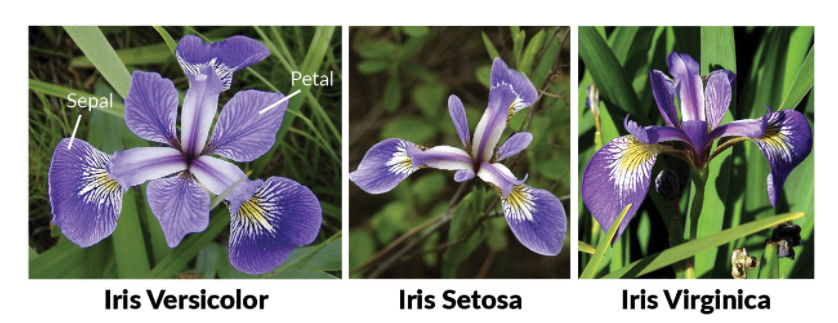

fonte da  imagem: https://miro.medium.com/max/2550/0*GVjzZeYrir0R_6-X.png

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
#%matplotlib inline

import seaborn as sns
sns.set(style="darkgrid")

import warnings
warnings.filterwarnings("ignore")

In [18]:
iris=pd.read_csv('https://raw.githubusercontent.com/profandersonvanin01/machine_learning/main/iris.csv')
iris.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [19]:
iris.describe()

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


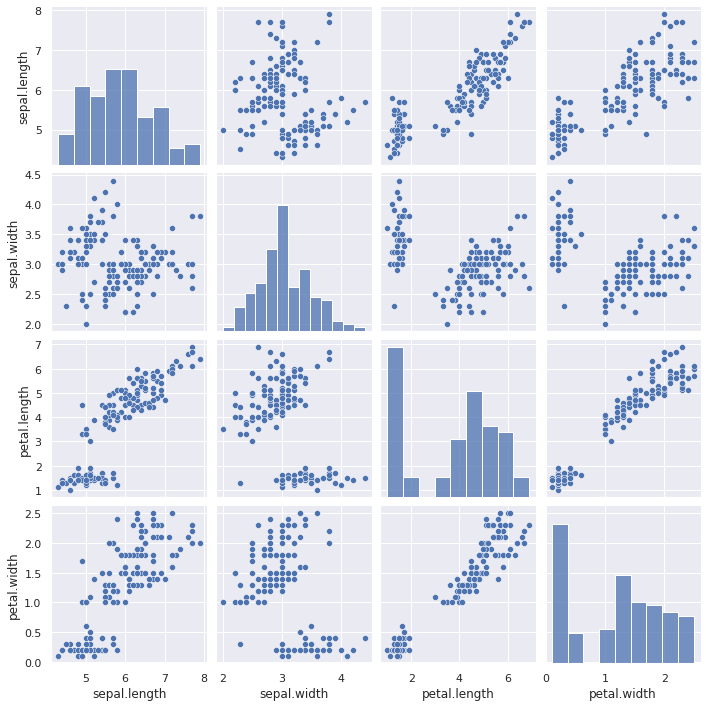

In [20]:
sns.pairplot(iris)

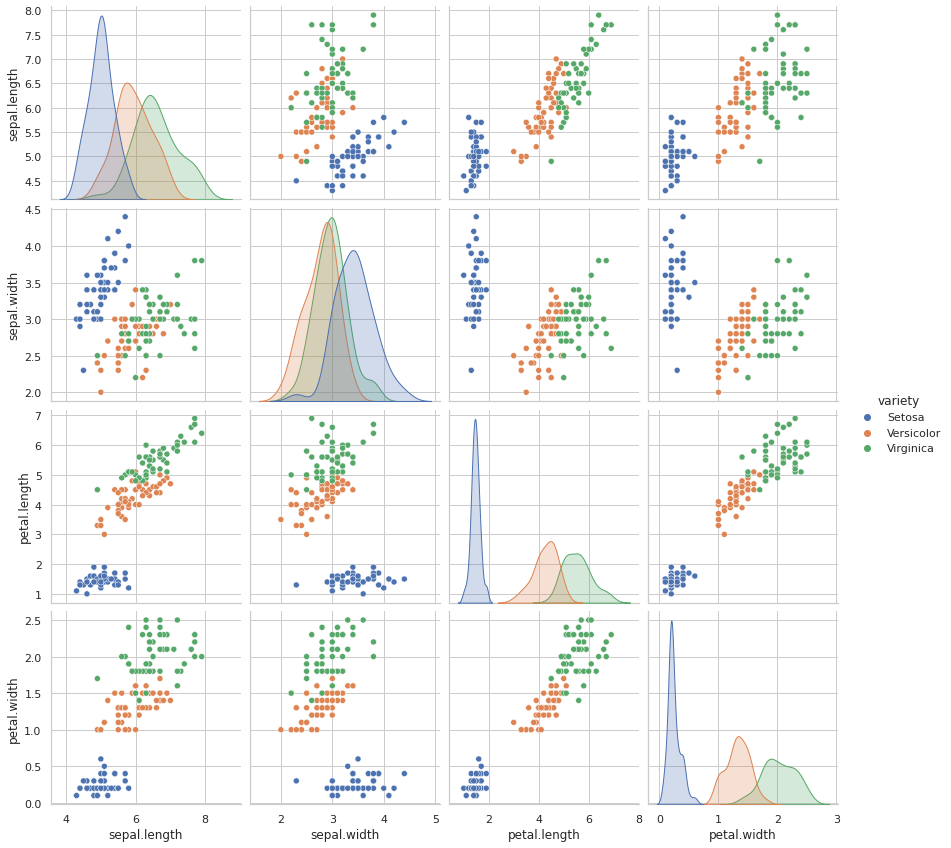

In [46]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="variety",size=3);
plt.show()

In [29]:
x = iris.iloc[:,[0,1,2,3]].values

In [30]:
x

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

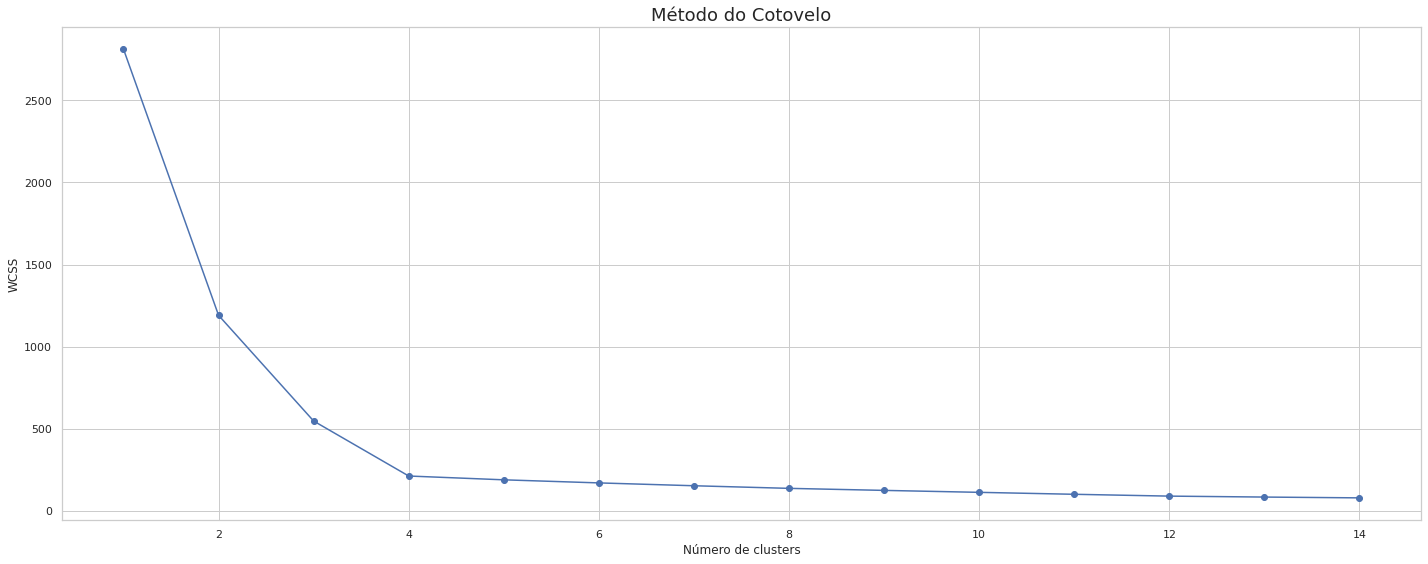

In [53]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(20,8))
plt.title('Método do Cotovelo', fontsize=18)
plt.grid(True)
plt.plot(range(1, 15), wcss,"-o")
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.tight_layout()
plt.show()

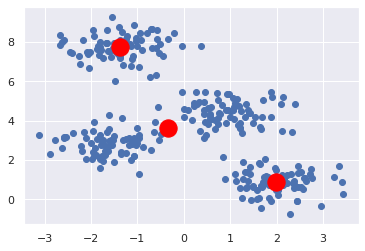

In [33]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)
plt.scatter(X[:,0], X[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red')
plt.show()

In [36]:
#Aplicando Kmeans no dataset
kmeans = KMeans(n_clusters=3, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(x)

In [44]:
y_kmeans

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

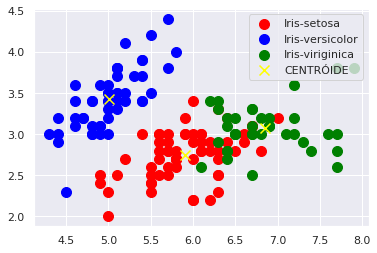

In [43]:
#visualizando os clusters
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c= 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c= 'blue', label = 'Iris-versicolor')
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c= 'green', label = 'Iris-viriginica')

#Mostrando os centróides dos clusters
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='yellow', label = 'CENTRÓIDE', marker='x')
plt.legend()